<a href="https://colab.research.google.com/github/tl614-rutgers/gisTest/blob/main/ps2_submit(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### My Plan
I plan on doing my research on covid-19 within NJ counties seeing which area had the most deaths and seeing which counties had the most hospitalizations related to covid and how it relates to the population density. I plan to provide further research in seeing how people were affected by covid relating to racial ethnic groups.

Data Sources:

https://data.cdc.gov/Public-Health-Surveillance/United-States-COVID-19-Community-Levels-by-County/3nnm-4jni/data hospitalization data

https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/new-jersey/ covid deaths data

https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwi-h9WmqMuBAxXAlWoFHVG7CPIQFnoECBYQAQ&url=https%3A%2F%2Fwww.nj.gov%2Flabor%2Flabormarketinformation%2Fassets%2FPDFs%2Fdmograph%2Fest%2Fmcd%2Fdensity.xlsx&usg=AOvVaw2WUNow4omLDOveDVwJYnAc&opi=89978449 population density data of 2020

import os, zipfile
import pandas as pd
import matplotlib.pyplot as plt

import geopandas as gpd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from google.colab import files
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [2]:
!pip install mapclassify
import mapclassify

## shapefile data and population density for 2020

In [3]:
! wget -q -O bounds_nj_shp.zip https://docs.google.com/uc?id=1GUI-JMkom1XFGaa0k77C1JmlEVH6Eenu&export=download
zip_ref = zipfile.ZipFile('bounds_nj_shp.zip', 'r'); zip_ref.extractall(); zip_ref.close()
njc=gpd.read_file('nj_counties.shp')

<Axes: >

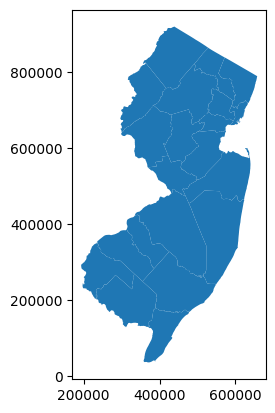

In [4]:
njc.plot()

In [5]:
njc.dtypes

COUNTY          object
COUNTY_LAB      object
CO              object
GNIS_NAME       object
GNIS            object
FIPSSTCO        object
FIPSCO          object
ACRES          float64
SQ_MILES       float64
POP2010          int64
POP2000          int64
POP1990          int64
POP1980          int64
POPDEN2010       int64
POPDEN2000       int64
POPDEN1990       int64
POPDEN1980       int64
REGION          object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

In [6]:
njc.head(5)

,COUNTY,COUNTY_LAB,CO,GNIS_NAME,GNIS,FIPSSTCO,FIPSCO,ACRES,SQ_MILES,POP2010,...,POP1990,POP1980,POPDEN2010,POPDEN2000,POPDEN1990,POPDEN1980,REGION,Shape_Leng,Shape_Area,geometry
0,ATLANTIC,Atlantic County,ATL,County of Atlantic,882270,34001,1,390815.404215,610.649069,274549,...,275372,204615,450,414,451,335,COASTAL,650228.153906,1.702385e+10,"POLYGON ((443056.010 311529.770, 443068.440 31..."
1,BERGEN,Bergen County,BER,County of Bergen,882271,34003,3,153490.275182,239.828555,905116,...,829592,849843,3774,3686,3459,3544,NORTHEASTERN,443326.122021,6.686010e+09,"POLYGON ((656200.963 783614.366, 656141.127 78..."
2,BURLINGTON,Burlington County,BUR,County of Burlington,882272,34005,5,525002.683590,820.316693,448734,...,395066,362542,547,516,482,442,SOUTHERN,788906.717476,2.286903e+10,"POLYGON ((436626.690 491361.780, 436701.190 49..."
3,CAMDEN,Camden County,CAM,County of Camden,882273,34007,7,145650.507808,227.578918,513657,...,532498,471650,2257,2236,2340,2073,SOUTHERN,495010.034901,6.344511e+09,"POLYGON ((342763.990 423475.830, 342804.100 42..."
4,CAPE MAY,Cape May County,CAP,County of Cape May,882274,34009,9,183126.574240,286.135272,97265,...,95089,82266,340,358,332,288,COASTAL,514564.858771,7.976962e+09,"POLYGON ((390389.730 177065.130, 390410.170 17..."


In [9]:
! wget -q -O density.csv https://raw.githubusercontent.com/tl614-rutgers/gisTest/main/density.csv
popden = pd.read_csv('density.csv')
popden

,"Population and Population Density by County: New Jersey, Census 2020 and Estimates 2022",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Land Area,NaN,Resident Population,NaN,NaN,Population per square mile,NaN
2,NaN,NaN,in Square,NaN,Census,Estimates,NaN,Census,Estimates
3,FIPS,County,Miles,NaN,2020,2022,NaN,2020,2022
4,34000,New Jersey,"7,354.8",NaN,"9,289,031","9,261,699",NaN,"1,263.0","1,259.3"
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,34001,Atlantic County,555.5,NaN,"274,536","275,638",NaN,494.2,496.2
7,34003,Bergen County,232.8,NaN,"955,746","952,997",NaN,"4,105.6","4,093.8"
8,34005,Burlington County,799.3,NaN,"461,863","466,103",NaN,577.8,583.1
9,34007,Camden County,221.4,NaN,"523,486","524,907",NaN,"2,364.9","2,371.3"


In [10]:
popden.dtypes

Population and Population Density by County: New Jersey, Census 2020 and Estimates 2022     object
Unnamed: 1                                                                                  object
Unnamed: 2                                                                                  object
Unnamed: 3                                                                                 float64
Unnamed: 4                                                                                  object
Unnamed: 5                                                                                  object
Unnamed: 6                                                                                 float64
Unnamed: 7                                                                                  object
Unnamed: 8                                                                                  object
dtype: object

In [11]:
popden1 = popden[['Unnamed: 1', 'Unnamed: 7']]
popden1.rename(columns={'Unnamed: 1': 'county'}, inplace=True)
popden1.rename(columns={'Unnamed: 7': 'popden2020'}, inplace=True)
popden1

<ipython-input-11-a64ce4afe56b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popden1.rename(columns={'Unnamed: 1': 'county'}, inplace=True)
<ipython-input-11-a64ce4afe56b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  popden1.rename(columns={'Unnamed: 7': 'popden2020'}, inplace=True)


,county,popden2020
0,NaN,NaN
1,NaN,Population per square mile
2,NaN,Census
3,County,2020
4,New Jersey,"1,263.0"
5,NaN,NaN
6,Atlantic County,494.2
7,Bergen County,"4,105.6"
8,Burlington County,577.8
9,Camden County,"2,364.9"


In [12]:
popden2 = popden1.iloc[6:27, :]
popden2

,county,popden2020
6,Atlantic County,494.2
7,Bergen County,"4,105.6"
8,Burlington County,577.8
9,Camden County,"2,364.9"
10,Cape May County,378.8
11,Cumberland County,318.9
12,Essex County,"6,842.9"
13,Gloucester County,938.8
14,Hudson County,"15,691.7"
15,Hunterdon County,301.4


In [16]:
njcpopden = pd.merge(njc, popden2, left_on='COUNTY_LAB', right_on='county',how='outer', indicator=True)
njcpopden[['COUNTY_LAB', 'popden2020', '_merge']]
njcpopden1 = pd.merge(njc, popden2, left_on='COUNTY_LAB', right_on='county',how='inner', indicator=False)

,COUNTY_LAB,popden2020,_merge
0,Atlantic County,494.2,both
1,Bergen County,"4,105.6",both
2,Burlington County,577.8,both
3,Camden County,"2,364.9",both
4,Cape May County,378.8,both
5,Cumberland County,318.9,both
6,Essex County,"6,842.9",both
7,Gloucester County,938.8,both
8,Hudson County,"15,691.7",both
9,Hunterdon County,301.4,both


<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwi-h9WmqMuBAxXAlWoFHVG7CPIQFnoECBYQAQ&url=https%3A%2F%2Fwww.nj.gov%2Flabor%2Flabormarketinformation%2Fassets%2FPDFs%2Fdmograph%2Fest%2Fmcd%2Fdensity.xlsx&usg=AOvVaw2WUNow4omLDOveDVwJYnAc&opi=89978449')

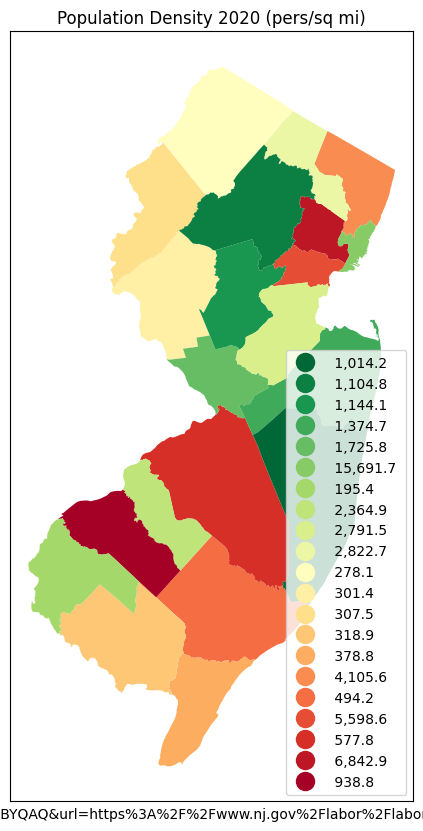

In [17]:
fig, ax = plt.subplots(1, figsize=(6,10))
njcpopden.plot(ax=ax,column='popden2020',legend=True,cmap='RdYlGn_r',
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
ax.title.set_text("Population Density 2020 (pers/sq mi)")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition: https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwi-h9WmqMuBAxXAlWoFHVG7CPIQFnoECBYQAQ&url=https%3A%2F%2Fwww.nj.gov%2Flabor%2Flabormarketinformation%2Fassets%2FPDFs%2Fdmograph%2Fest%2Fmcd%2Fdensity.xlsx&usg=AOvVaw2WUNow4omLDOveDVwJYnAc&opi=89978449''')

In [38]:
! wget -q -O covid_deaths_usafacts.csv https://raw.githubusercontent.com/tl614-rutgers/gisTest/main/covid_deaths_usafacts.csv
nj_deaths = pd.read_csv('covid_deaths_usafacts.csv')
deaths = nj_deaths.loc[nj_deaths['State'] == 'NJ']
deaths.head(5)

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2023-07-14,2023-07-15,2023-07-16,2023-07-17,2023-07-18,2023-07-19,2023-07-20,2023-07-21,2023-07-22,2023-07-23
1804,0,Statewide Unallocated,NJ,34,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1805,34001,Atlantic County,NJ,34,0,0,0,0,0,0,...,1073,1073,1073,1073,1073,1073,1073,1073,1073,1073
1806,34003,Bergen County,NJ,34,0,0,0,0,0,0,...,3708,3708,3708,3708,3708,3708,3708,3708,3708,3708
1807,34005,Burlington County,NJ,34,0,0,0,0,0,0,...,1364,1364,1364,1364,1364,1364,1364,1364,1364,1364
1808,34007,Camden County,NJ,34,0,0,0,0,0,0,...,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959


In [39]:
deaths.dtypes

countyFIPS      int64
County Name    object
State          object
StateFIPS       int64
2020-01-22      int64
                ...  
2023-07-19      int64
2023-07-20      int64
2023-07-21      int64
2023-07-22      int64
2023-07-23      int64
Length: 1269, dtype: object

In [40]:
deaths1 = deaths[['County Name', '2022-08-11']]
deaths1.rename(columns={'County Name': 'county'}, inplace=True)
deaths1.rename(columns={'2022-08-11': 'aug 11, 2022'}, inplace=True)
deaths1

<ipython-input-40-b0bb25162ead>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths1.rename(columns={'County Name': 'county'}, inplace=True)
<ipython-input-40-b0bb25162ead>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths1.rename(columns={'2022-08-11': 'aug 11, 2022'}, inplace=True)


,county,"aug 11, 2022"
1804,Statewide Unallocated,0
1805,Atlantic County,1033
1806,Bergen County,3533
1807,Burlington County,1275
1808,Camden County,1875
1809,Cape May County,318
1810,Cumberland County,625
1811,Essex County,3658
1812,Gloucester County,996
1813,Hudson County,2758


In [41]:
deaths2 = deaths1.iloc[1:, :]
deaths2

,county,"aug 11, 2022"
1805,Atlantic County,1033
1806,Bergen County,3533
1807,Burlington County,1275
1808,Camden County,1875
1809,Cape May County,318
1810,Cumberland County,625
1811,Essex County,3658
1812,Gloucester County,996
1813,Hudson County,2758
1814,Hunterdon County,283


In [45]:
deaths2['county'] = deaths2.county.str.replace('County ', 'County')
njd

<ipython-input-45-f4d74bb6a521>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  deaths2['county'] = deaths2.county.str.replace('County ', 'County')


,county,"aug 11, 2021",COUNTY,c
1805,Atlantic County,698,ATLANTIC COUNTY,Atlantic County
1806,Bergen County,2905,BERGEN COUNTY,Bergen County
1807,Burlington County,886,BURLINGTON COUNTY,Burlington County
1808,Camden County,1346,CAMDEN COUNTY,Camden County
1809,Cape May County,209,CAPE MAY COUNTY,Cape May County
1810,Cumberland County,441,CUMBERLAND COUNTY,Cumberland County
1811,Essex County,3041,ESSEX COUNTY,Essex County
1812,Gloucester County,648,GLOUCESTER COUNTY,Gloucester County
1813,Hudson County,2316,HUDSON COUNTY,Hudson County
1814,Hunterdon County,177,HUNTERDON COUNTY,Hunterdon County


In [37]:
njc1 = pd.merge(njc, njd, left_on='COUNTY_LAB', right_on='c', how='outer', indicator=True)
njc1[['COUNTY_LAB', 'aug 11, 2022', '_merge']]
njc2 = pd.merge(njc, njd, left_on='COUNTY_LAB', right_on='c', how='outer', indicator=False)

KeyError: ignored

<Axes: >

[]

[]

Text(0.5, 80.7222222222222, 'source/definition: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/new-jersey/')

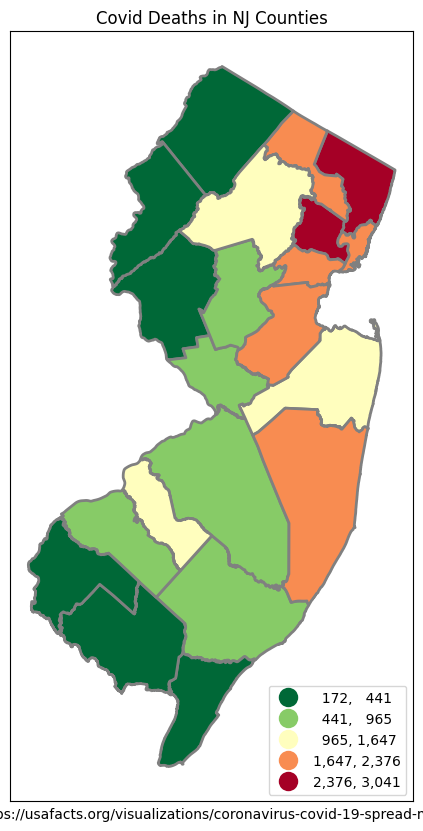

In [35]:
fig, ax = plt.subplots(1, figsize=(6,10))
njc2.plot(ax=ax,column='aug 11, 2021',legend=True,cmap='RdYlGn_r',
          scheme='natural_breaks',k=5, edgecolor='grey',linewidth=2,
          legend_kwds= {"fmt": "{:,.0f}",'loc':'lower right','markerscale':1.4})
ax.title.set_text("Covid Deaths in NJ Counties")
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('''source/definition: https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/state/new-jersey/''')

In [30]:
!wget -q -O United_States_COVID-19_Community_Levels_by_County.csv https://raw.githubusercontent.com/tl614-rutgers/gisTest/main/United_States_COVID-19_Community_Levels_by_County.csv
hosp_admit = pd.read_csv('United_States_COVID-19_Community_Levels_by_County.csv')
admissions = hosp_admit.loc[hosp_admit['date_updated'] == '8/11/22']
admissions.head(5)

,county,county_fips,state,county_population,health_service_area_number,health_service_area,health_service_area_population,covid_inpatient_bed_utilization,covid_hospital_admissions_per_100k,covid_cases_per_100k,covid-19_community_level,date_updated
16,Cape May,34009,New Jersey,92039,64,"Atlantic (Atlantic City), NJ - Cape May, NJ",355709,5.0,27.3,272.71,High,8/11/22
17,Hunterdon,34019,New Jersey,124371,93,"Hunterdon, NJ - Warren (Phillipsburg), NJ",229638,3.3,10.0,176.09,Medium,8/11/22
18,Monmouth,34025,New Jersey,618795,108,"Monmouth, NJ - Ocean (Brick Township), NJ",1225981,6.5,16.5,234.00,High,8/11/22
19,Salem,34033,New Jersey,62385,23,"Camden (Camden), NJ - Burlington, NJ",1305841,6.0,17.5,203.57,High,8/11/22
20,Warren,34041,New Jersey,105267,93,"Hunterdon, NJ - Warren (Phillipsburg), NJ",229638,3.3,10.0,164.34,Medium,8/11/22
